In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import math
import sys
from pathlib import Path
import seaborn as sns

# Add 'src' to the system path
sys.path.append(str(Path().resolve() / 'src'))
from src.data.process_data import *
from src.data.clean_data import *
from src.utils.data_utils import *
from src.utils.plot_utils import *

IMPORTANT: these scripts/functions assume you have the following files in the data/raw directory:
- From the CMU dataset: 
    - movie.metadata.tsv
    - plot_summaries.txt
- From the TMDB dataset: 
    - TMDB_movie_dataset_v11.csv

AND have data/processed folder created

Note: download CMU dataset here: https://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz
and TMDB dataset here (Download button): https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies

In [24]:
# from raw files, creates clean datafiles
%run src/data/clean_data.py

sep ,
headers []
original df shape (1127777, 24)
after status (1102507, 24)
after release date (760210, 24)
after release year (760210, 25)
after runtime (759657, 25)
after duplicates (745322, 25)
after numeric columns (745321, 25)
after select columns (745321, 13)
sep 	
headers ['wikipedia_movie_id', 'freebase_ID', 'title', 'release_year', 'revenue', 'runtime', 'languages', 'countries', 'genres']
original df shape (81740, 9)
after status (81740, 9)
after release date (81740, 9)
after release year (44006, 9)
after runtime (36612, 9)
after duplicates (36548, 9)
after numeric columns (36548, 9)
after select columns (36548, 5)


In [25]:
# from clean data files, creates a dataframe with CMU + plots & TMDB movies 
%run src/data/process_data.py
df_combined = create_cmu_tmdb_dataset('data/processed/movies.csv','data/processed/plot_summaries.csv', 'data/processed/TMDB_clean.csv', 'inner')
df_tmdb = create_tmdb_dataset('data/processed/TMDB_clean.csv')

In [14]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19621 entries, 0 to 19620
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 19621 non-null  object
 1   release_year          19621 non-null  int64 
 2   summary               19621 non-null  object
 3   release_date          19621 non-null  object
 4   budget                19621 non-null  int64 
 5   original_language     19621 non-null  object
 6   overview              19621 non-null  object
 7   genres                19621 non-null  object
 8   production_companies  19621 non-null  object
 9   production_countries  19621 non-null  object
 10  spoken_languages      19621 non-null  object
 11  keywords              19621 non-null  object
 12  runtime               19621 non-null  int64 
 13  revenue               19621 non-null  int64 
 14  dvd_era               19621 non-null  object
dtypes: int64(4), object(11)
memory usage

In [15]:
df_combined.head()

,title,release_year,summary,release_date,budget,original_language,overview,genres,production_companies,production_countries,spoken_languages,keywords,runtime,revenue,dvd_era
0,White Of The Eye,1987,A series of murders of rich young women throug...,1987-06-19,0,en,"In a wealthy and isolated desert community, a ...","[Horror, Thriller]",[Mrs. White's Productions],[United Kingdom],[English],"[based on novel or book, gas station, psychopa...",221,0,pre
1,A Woman in Flames,1983,"Eva, an upper class housewife, becomes frustra...",1983-05-11,0,de,"Eva, an upper-class housewife, frustratedly le...",[Drama],[Dieter Geissler Filmproduktion],[Germany],[German],"[jealousy, eroticism, gigolo, longing, dominat...",212,0,pre
2,The Sorcerer's Apprentice,2002,"Every hundred years, the evil Morgana returns...",2002-04-12,0,en,"Every hundred years, the evil sorceress Morgan...","[Adventure, Family, Fantasy]","[Peakviewing Productions, Peakviewing Transatl...",[United Kingdom],"[French, English]",[morgana],172,0,during
3,Little city,1997,"Adam, a San Francisco-based artist who works a...",1997-04-04,0,en,Best friends Adam and Kevin have a lot in comm...,"[Comedy, Romance]","[Bandeira Entertainment, Miramax]",[],[English],[],183,0,pre
4,Henry V,1989,{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,1989-10-05,9000000,en,Gritty adaption of William Shakespeare's play ...,"[War, Drama, History]","[BBC Film, Renaissance Films, Samuel Goldwyn C...",[United Kingdom],[English],"[france, kingdom, theater play, based on true ...",274,20337800,pre


In [10]:
%run src/utils/data_utils.py
%run src/utils/plot_utils.py

# CMU dataset

## Production companies

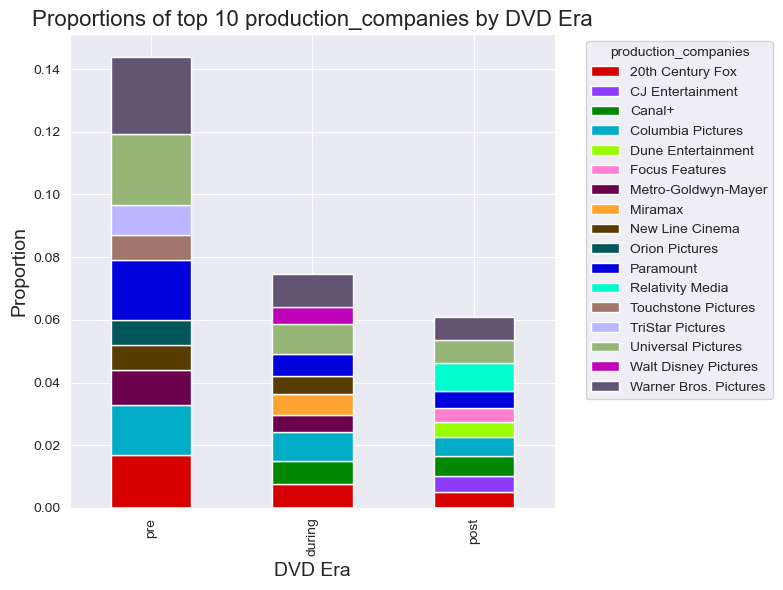

In [11]:
top_10_prod_companies = top_proportions_per_era(df_combined, 'production_companies', 10, islist=True)
plot_top_proportions_per_era(top_10_prod_companies, 'production_companies', 10)

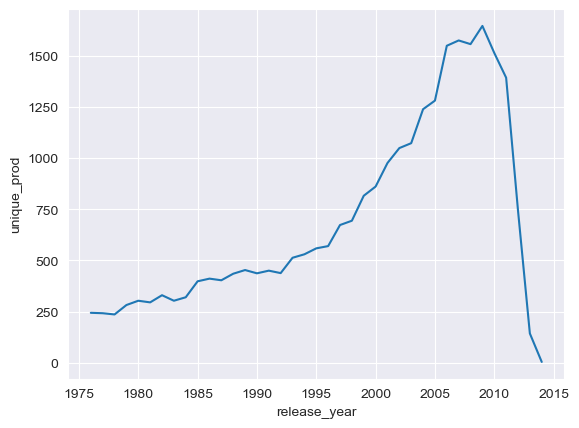

In [12]:
num_production_companies_per_year = df_combined.explode('production_companies').groupby('release_year')['production_companies'].nunique().reset_index(name='unique_prod')
sns.lineplot(data=num_production_companies_per_year, x='release_year', y='unique_prod')
plt.show()

## Countries

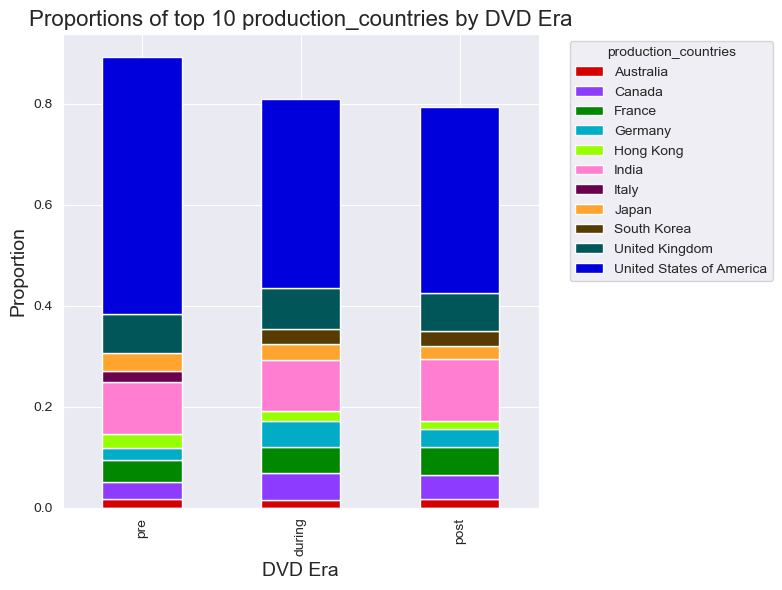

In [13]:
top_10_prod_countries = top_proportions_per_era(df_combined, 'production_countries', 10, True)
plot_top_proportions_per_era(top_10_prod_countries, 'production_countries', 10)

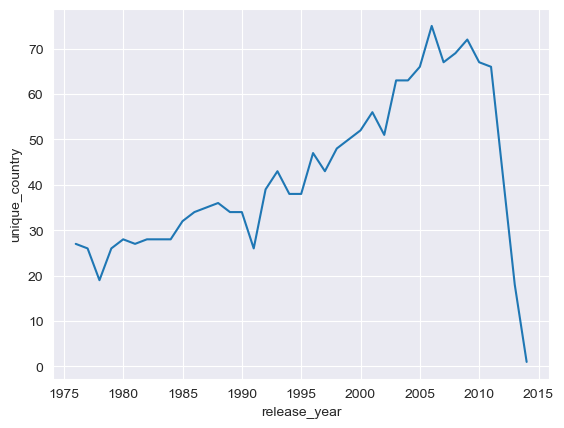

In [14]:
num_production_countries_per_year = df_combined.explode('production_countries').groupby('release_year')['production_countries'].nunique().reset_index(name='unique_country')
sns.lineplot(data=num_production_countries_per_year, x='release_year', y='unique_country')
plt.show()

## Original language

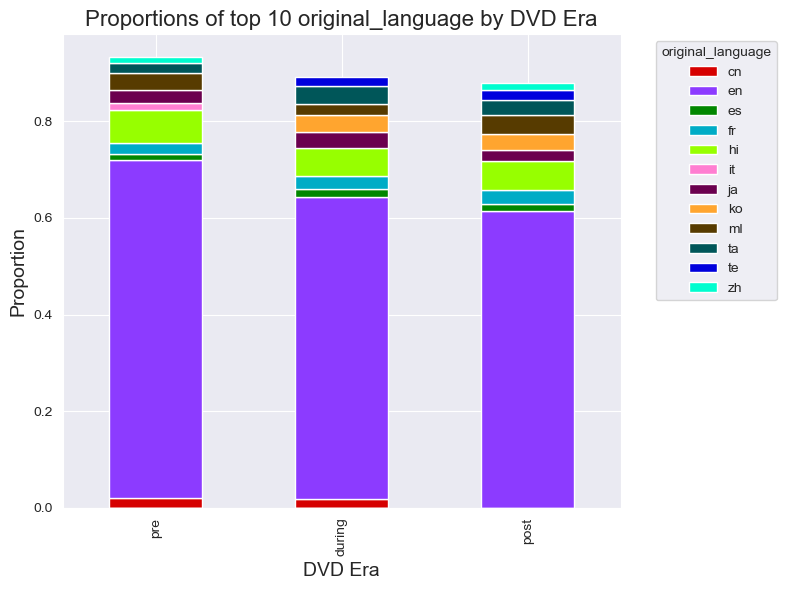

In [15]:
top_10_og_lang = top_proportions_per_era(df_combined, 'original_language', 10)
plot_top_proportions_per_era(top_10_og_lang, 'original_language', 10)

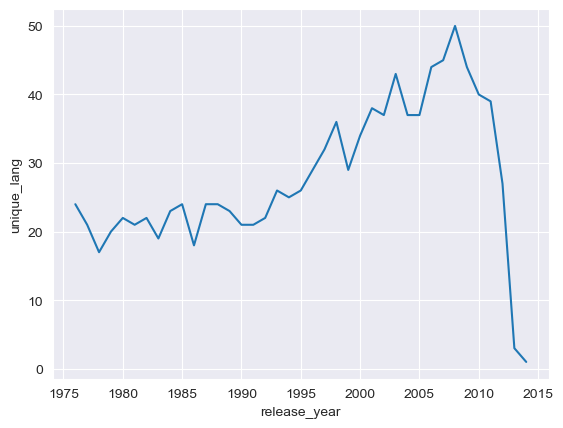

In [16]:
num_lang_per_year = df_combined.groupby('release_year')['original_language'].nunique().reset_index(name='unique_lang')
sns.lineplot(data=num_lang_per_year, x='release_year', y='unique_lang')
plt.show()

In [17]:
num_movies_per_year = df_combined.groupby('release_year').size().reset_index(name='num_movies')
num_movies_per_year.head()

,release_year,num_movies
0,1976,218
1,1977,230
2,1978,242
3,1979,256
4,1980,282


In [18]:
num_lang_per_year['ratio'] = num_lang_per_year['unique_lang'] / num_movies_per_year['num_movies']
num_lang_per_year.head()

,release_year,unique_lang,ratio
0,1976,24,0.110092
1,1977,21,0.091304
2,1978,17,0.070248
3,1979,20,0.078125
4,1980,22,0.078014


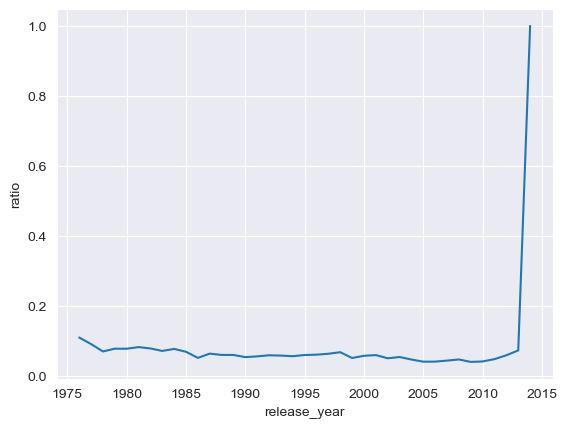

In [19]:
sns.lineplot(data=num_lang_per_year, x='release_year', y='ratio')
plt.show()

## genre


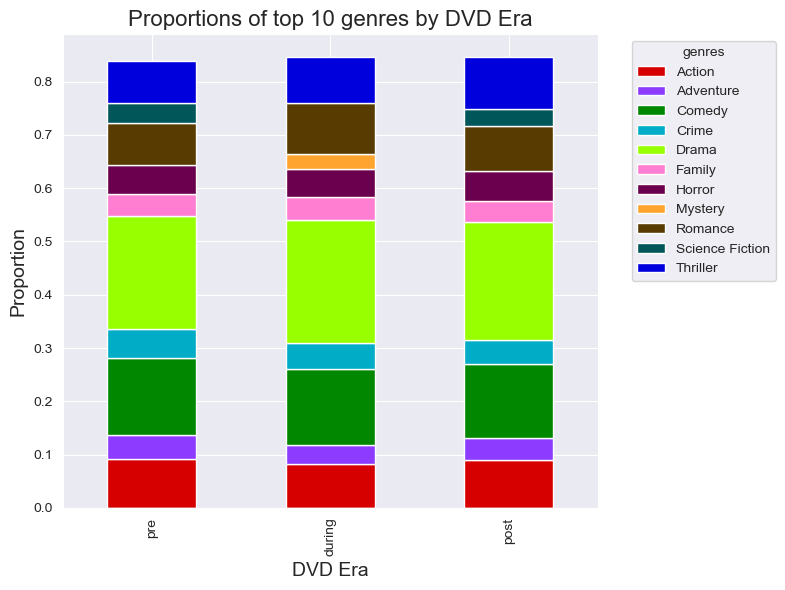

In [20]:
top_10_genre =top_proportions_per_era(df_combined, 'genres', 10, True)
plot_top_proportions_per_era(top_10_genre, 'genres', 10)

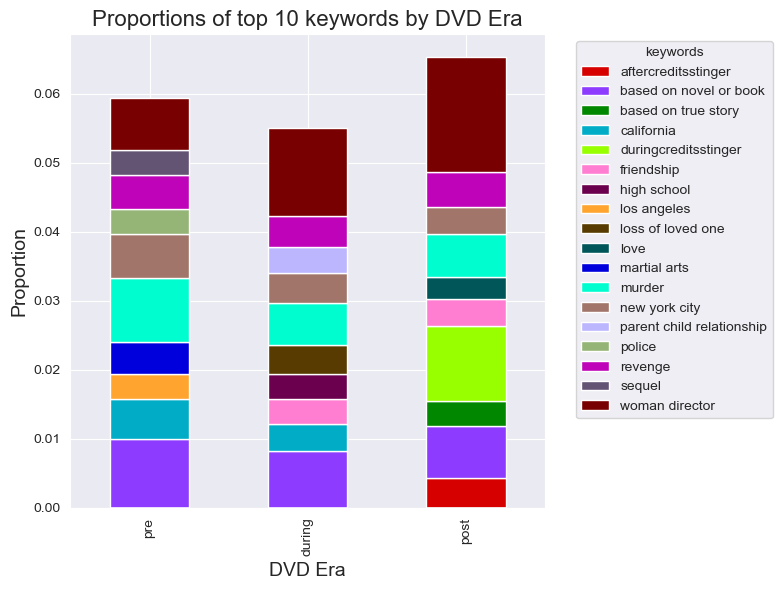

In [21]:
top_10_keyword =top_proportions_per_era(df_combined, 'keywords', 10, True)
plot_top_proportions_per_era(top_10_keyword, 'keywords', 10)

# TMDB dataset

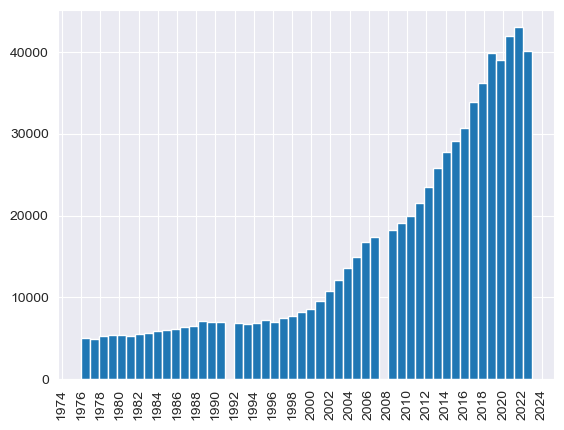

In [50]:
plt.hist(df_tmdb['release_year'], bins=50)
plt.locator_params(axis='x', nbins=50) 
plt.xticks(rotation=90)
plt.show()

In [52]:
df_tmdb['release_year'].describe()

count    745860.000000
mean       2009.186499
std          12.347506
min        1976.000000
25%        2003.000000
50%        2013.000000
75%        2019.000000
max        2023.000000
Name: release_year, dtype: float64

## Production countries

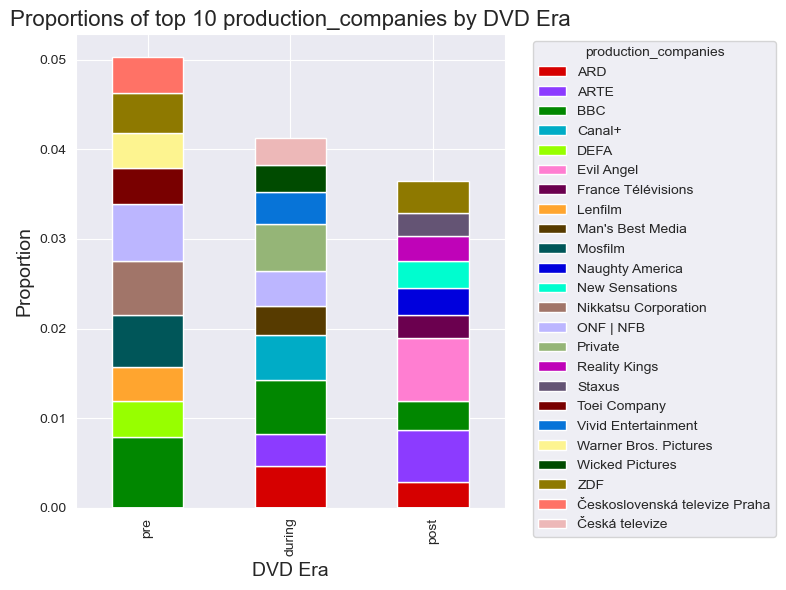

In [26]:
top_10_prod_companies = top_proportions_per_era(df_tmdb, 'production_companies', 10, islist=True)
plot_top_proportions_per_era(top_10_prod_companies, 'production_companies', 10)

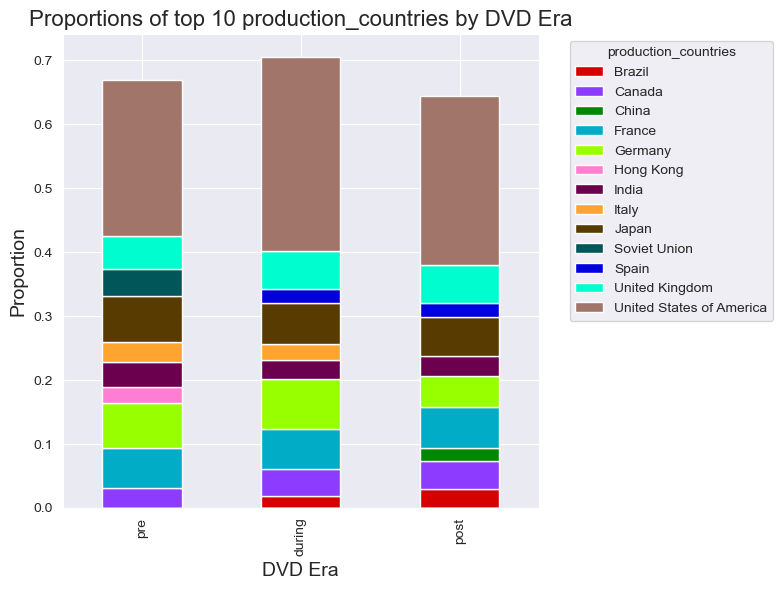

In [27]:
top_10_prod_countries = top_proportions_per_era(df_tmdb, 'production_countries', 10, islist=True)
plot_top_proportions_per_era(top_10_prod_countries, 'production_countries', 10)

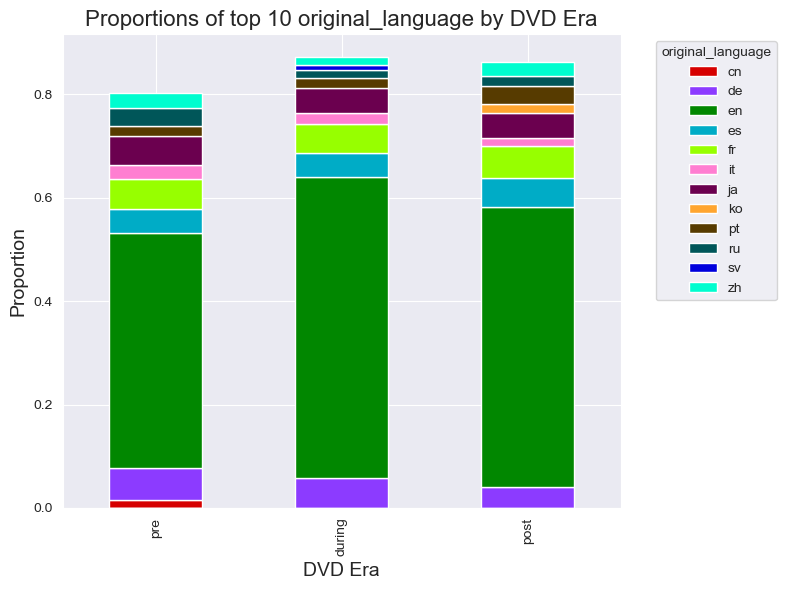

In [28]:
top_10_og_lang = top_proportions_per_era(df_tmdb, 'original_language', 10)
plot_top_proportions_per_era(top_10_og_lang, 'original_language', 10)

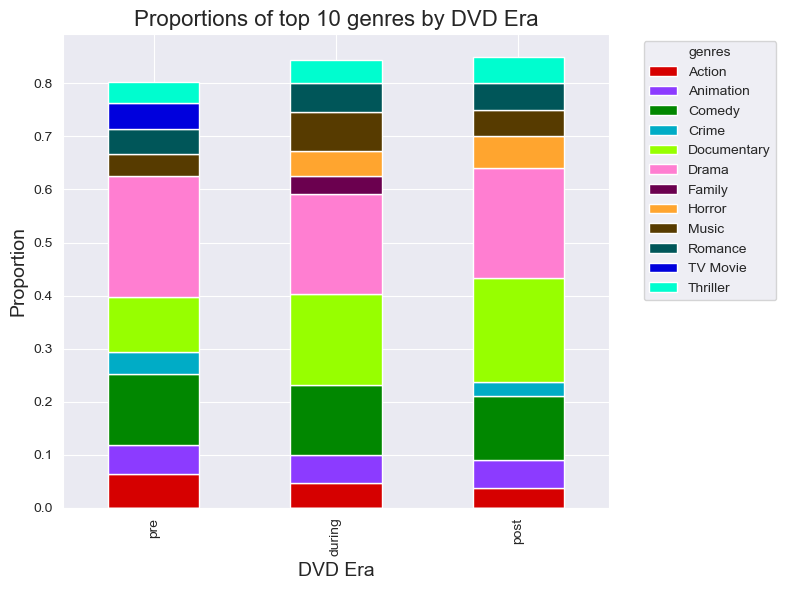

In [29]:
top_10_genre =top_proportions_per_era(df_tmdb, 'genres', 10, True)
plot_top_proportions_per_era(top_10_genre, 'genres', 10)

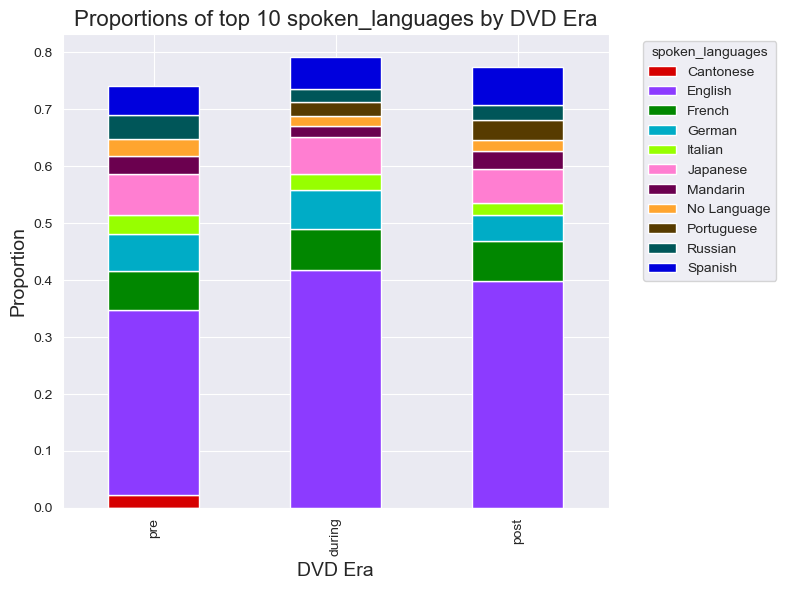

In [30]:
top_10_spoken_languages = top_proportions_per_era(df_tmdb, 'spoken_languages', 10, True)
plot_top_proportions_per_era(top_10_spoken_languages, 'spoken_languages', 10)

# Runtime


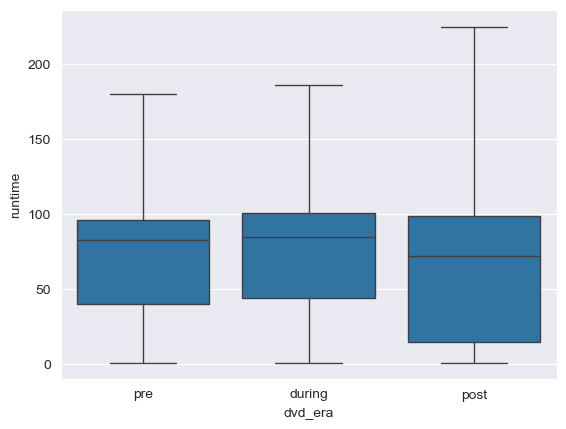

In [31]:
sns.boxplot(x='dvd_era', y='runtime', data=df_tmdb[df_tmdb['runtime'] > 0], showfliers=False, order=['pre', 'during', 'post'])
plt.show()

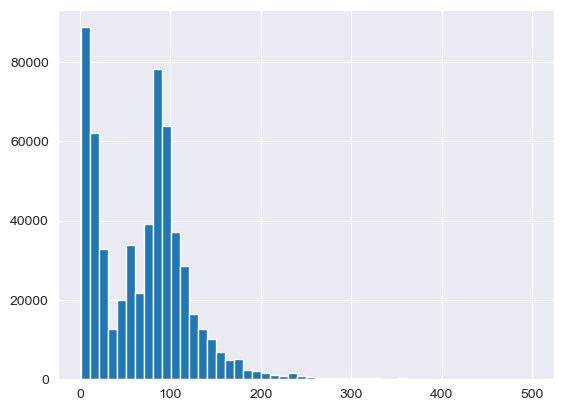

In [46]:
plt.hist(df_tmdb[(df_tmdb['runtime'] > 0)]['runtime'], bins=50)
plt.show()

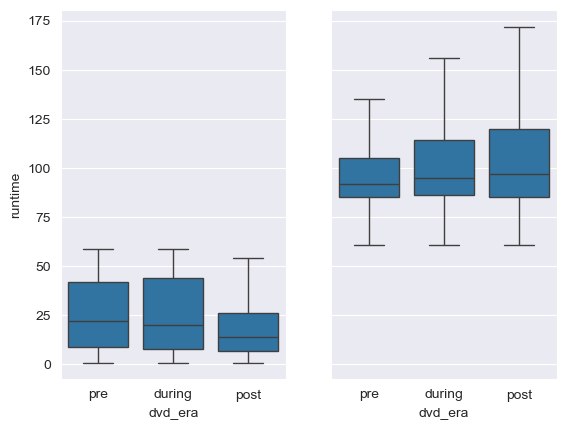

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot(ax=ax1, x='dvd_era', y='runtime', data=df_tmdb[(df_tmdb['runtime'] > 0) & (df_tmdb['runtime'] < 60)], showfliers=False, order=['pre', 'during', 'post'])
sns.boxplot(ax=ax2, x='dvd_era', y='runtime', data=df_tmdb[df_tmdb['runtime'] > 60], showfliers=False, order=['pre', 'during', 'post'])
plt.show()

In [32]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Example DataFrame with 'runtime' and 'dvd_era' columns
# df = pd.DataFrame({...})

# ANOVA test
anova_result = stats.f_oneway(
    df_tmdb[df_tmdb['dvd_era'] == 'pre']['runtime'],
    df_tmdb[df_tmdb['dvd_era'] == 'during']['runtime'],
    df_tmdb[df_tmdb['dvd_era'] == 'post']['runtime']
)

print("ANOVA result:", anova_result)

# Post hoc test if ANOVA is significant
if anova_result.pvalue < 0.05:
    tukey_result = pairwise_tukeyhsd(df_tmdb['runtime'], df_tmdb['dvd_era'])
    print(tukey_result)

ANOVA result: F_onewayResult(statistic=638.6731598875705, pvalue=7.331346565464043e-278)
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
during   post  -5.8014   0.0 -6.2241 -5.3786   True
during    pre  -2.2375   0.0 -2.7455 -1.7296   True
  post    pre   3.5638   0.0   3.182  3.9456   True
---------------------------------------------------


In [48]:
df_tmdb[df_tmdb['runtime'] < 45].describe()

,revenue,runtime,budget,release_year
count,3.590680e+05,359068.000000,3.590680e+05,359068.000000
mean,3.834327e+04,8.320079,1.240564e+04,2010.559429
std,6.556195e+06,10.848180,1.870065e+06,12.161830
min,0.000000e+00,0.000000,0.000000e+00,1976.000000
25%,0.000000e+00,0.000000,0.000000e+00,2005.000000
50%,0.000000e+00,3.000000,0.000000e+00,2015.000000
75%,0.000000e+00,14.000000,0.000000e+00,2020.000000
max,3.000000e+09,44.000000,8.000000e+08,2023.000000


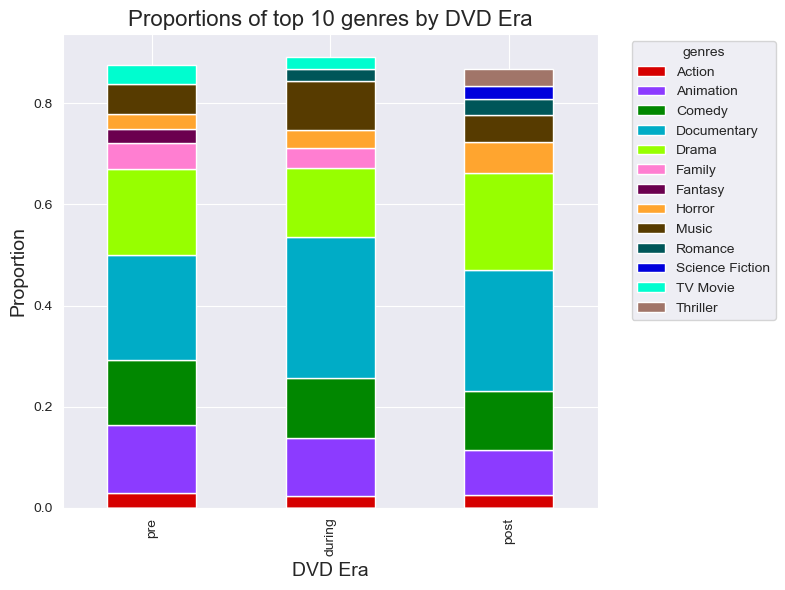

In [50]:
top_10_genre =top_proportions_per_era(df_tmdb[df_tmdb['runtime'] < 60], 'genres', 10, True)
plot_top_proportions_per_era(top_10_genre, 'genres', 10)

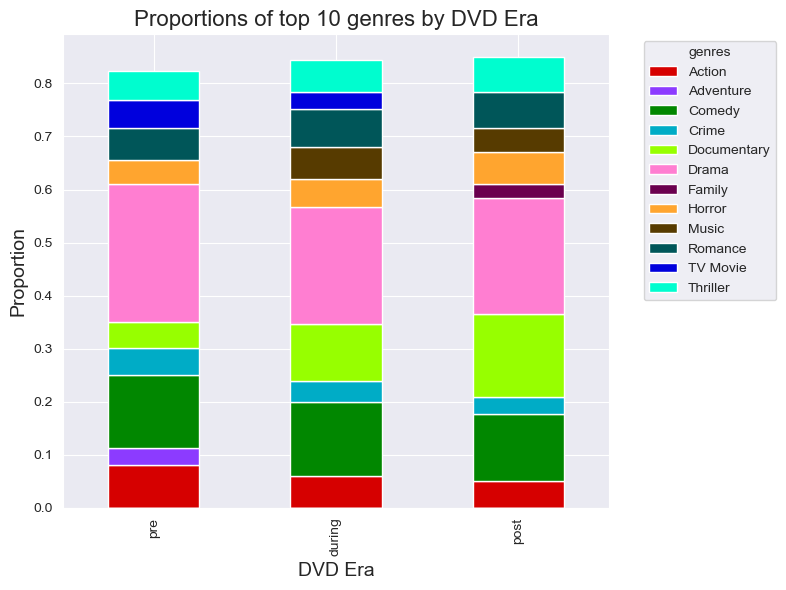

In [51]:
top_10_genre =top_proportions_per_era(df_tmdb[df_tmdb['runtime'] >= 60], 'genres', 10, True)
plot_top_proportions_per_era(top_10_genre, 'genres', 10)